In [4]:
from datetime import date
import pandas as pd
import quandl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras import layers, Sequential
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    
google_stock = pd.read_csv("../data/BCHAIN-MKPRU.csv").dropna(axis=0)

def run(time_stamp = 30):
    global google_stock
    # 划分训练集与验证集
    google_stock = google_stock[['Value']]  #  'Volume'

    train = google_stock[0:1200 + time_stamp]
    valid = google_stock[1200 + time_stamp:]

    # 归一化
    scaler = MinMaxScaler(feature_range=(0, 1))  
    scaled_data = scaler.fit_transform(train)
    x_train, y_train = [], []


    # 训练集
    for i in range(time_stamp, len(train)):
        x_train.append(scaled_data[i - time_stamp:i])
        y_train.append(scaled_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # 验证集
    scaled_data = scaler.fit_transform(valid)
    x_valid, y_valid = [], []
    for i in range(time_stamp, len(valid)):
        x_valid.append(scaled_data[i - time_stamp:i])
        y_valid.append(scaled_data[i, 0])

    x_valid, y_valid = np.array(x_valid), np.array(y_valid)

    # 总体数据集
    scaled_data = scaler.fit_transform(google_stock)
    x_total, y_total = [], []
    for i in range(time_stamp, len(google_stock)):
        x_total.append(scaled_data[i - time_stamp:i])
        y_total.append(scaled_data[i, 0])

    x_total, y_total = np.array(x_total), np.array(y_total)


    # 超参数
    epochs = 30
    batch_size = 16
    # LSTM 参数: return_sequences=True LSTM输出为一个序列。默认为False，输出一个值。
    # input_dim： 输入单个样本特征值的维度
    # input_length： 输入的时间点长度
    model = Sequential()
    model.add(layers.LSTM(units=100, return_sequences=True, input_dim=x_train.shape[-1], input_length=x_train.shape[1]))
    model.add(layers.LSTM(units=50))
    model.add(layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)


    x_valid_predict = model.predict(x_valid)
    scaler.fit_transform(pd.DataFrame(valid['Value'].values))
    # 反归一化
    x_valid_predict = scaler.inverse_transform(x_valid_predict)
    y_valid = scaler.inverse_transform([y_valid])

    rms = np.sqrt(np.mean(np.power((y_valid - x_valid_predict), 2)))
    print(f"test_rms:{rms}")
    return rms
run()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/30
75/75 [==============================] - 4s 12ms/step - loss: 0.0057
Epoch 2/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0018
Epoch 3/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0014
Epoch 4/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0012
Epoch 5/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0013
Epoch 6/30
75/75 [==============================] - 1s 12ms/step - loss: 9.5608e-04
Epoch 7/30
75/75 [==============================] - 1s 12ms/step - loss: 9.9058e-04
Epoch 8/30
75/75 [==============================] - 1s 12ms/step - loss: 8.8060e-04
Epoch 9/30
75/75 [==============================] - 1s 12ms/step - loss: 8.5690e-04
Epoch 10/30
75/75 [==============================] - 1s 12ms/step - loss: 8.9229e-04
Epoch 11/30
75/75 [==============================] - 1s 12ms/step - loss: 7.3288e-04
Epoch 12/30
75/75 [========

25246.92299510517

In [56]:
from datetime import date
import pandas as pd
import quandl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras import layers, Sequential
import tensorflow as tf
import time

In [37]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [38]:
google_stock = pd.read_csv("../data/BCHAIN-MKPRU.csv").dropna(axis=0)
print(google_stock.shape)
google_stock

(1826, 2)


,Date,Value
0,9/11/16,621.65
1,9/12/16,609.67
2,9/13/16,610.92
3,9/14/16,608.82
4,9/15/16,610.38
...,...,...
1821,9/6/21,51769.06
1822,9/7/21,52677.40
1823,9/8/21,46809.17
1824,9/9/21,46078.38


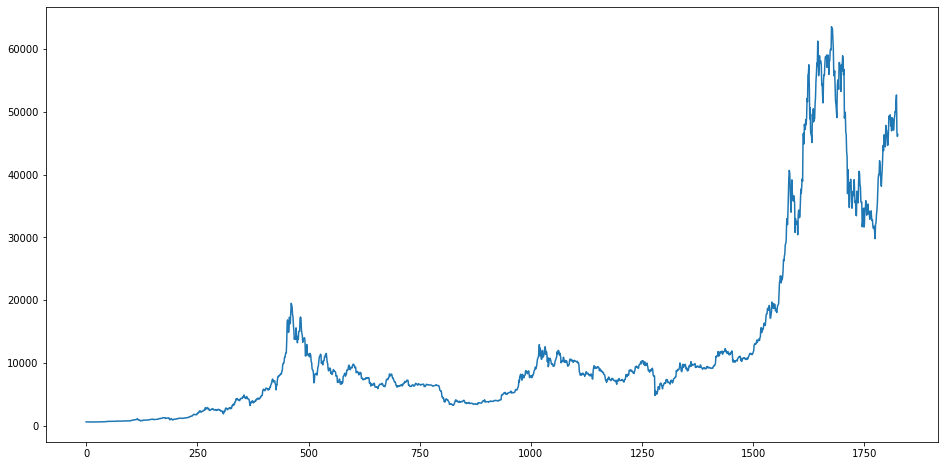

In [39]:
plt.figure(figsize=(16, 8))
plt.plot(google_stock['Value'])
plt.show()

In [40]:
# 时间点长度
time_stamp = 30

# 划分训练集与验证集
google_stock = google_stock[['Value']]  #  'Volume'

train = google_stock[0:1200 + time_stamp]
print(f"train.shape:{train.shape}")
valid = google_stock[1200 + time_stamp:]
print(f"valid.shape:{valid.shape}")

# 归一化
scaler = MinMaxScaler(feature_range=(0, 1))  
scaled_data = scaler.fit_transform(train)
x_train, y_train = [], []


# 训练集
print(f"scaled_data.shape:{scaled_data.shape}")
print(f"scaled_data[0]:{scaled_data[0]}")
for i in range(time_stamp, len(train)):
    x_train.append(scaled_data[i - time_stamp:i])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# 验证集
scaled_data = scaler.fit_transform(valid)
x_valid, y_valid = [], []
for i in range(time_stamp, len(valid)):
    x_valid.append(scaled_data[i - time_stamp:i])
    y_valid.append(scaled_data[i, 0])

x_valid, y_valid = np.array(x_valid), np.array(y_valid)

# 总体数据集
scaled_data = scaler.fit_transform(google_stock)
x_total, y_total = [], []
for i in range(time_stamp, len(google_stock)):
    x_total.append(scaled_data[i - time_stamp:i])
    y_total.append(scaled_data[i, 0])

x_total, y_total = np.array(x_total), np.array(y_total)

print(f"x_train.shape:{x_train.shape}")
print(f"x_valid.shape{x_valid.shape}")
print(f"x_total.shape:{x_total.shape}")
train.head()

train.shape:(1230, 1)
valid.shape:(596, 1)
scaled_data.shape:(1230, 1)
scaled_data[0]:[0.00145837]
x_train.shape:(1200, 30, 1)
x_valid.shape(566, 30, 1)
x_total.shape:(1796, 30, 1)


,Value
0,621.65
1,609.67
2,610.92
3,608.82
4,610.38


In [41]:
# 超参数
epochs = 30
batch_size = 16
# LSTM 参数: return_sequences=True LSTM输出为一个序列。默认为False，输出一个值。
# input_dim： 输入单个样本特征值的维度
# input_length： 输入的时间点长度
model = Sequential()
model.add(layers.LSTM(units=100, return_sequences=True, input_dim=x_train.shape[-1], input_length=x_train.shape[1]))
model.add(layers.LSTM(units=50))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 100)           40800     
                                                                 
 lstm_7 (LSTM)               (None, 50)                30200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/30
75/75 [==============================] - 3s 12ms/step - loss: 0.0079
Epoch 2/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0017
Epoch 3/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0015
Epoch 4/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0014
Epoch 5/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0012
Epoch 6/30
75/75 [==============================] - 1s 12ms/step - loss: 9.9380e-04
Epoch 7/30
75/75 [==============================] - 1s 12ms/step - loss: 9.3779e-04
Epoch 8/30
75/75 [==============================] - 1s 12ms/step - loss: 8.2972e-04
Epoch 9/30
75/75 [==============================] - 1s 12ms/step - loss: 9.6982e-04
Epoch 10/30
75/75 [==============================] - 1s 12ms/step - loss: 8.1437e-04
Epoch 11/30
75/75 [==============================] - 1s 12ms/step - loss: 8.9782e-04
Epoch 12/30
75/75 [==============================] - 1s 12ms/step - loss: 8.2981e-04
Epoch 13/

In [43]:
model.save("./trainedModel/BCHAIN-MKPRU.h5")

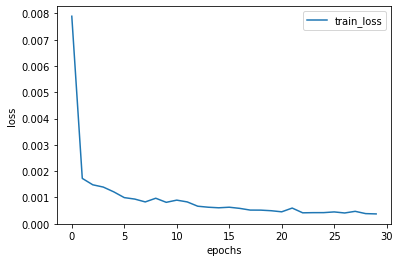

In [44]:
train_loss = history.history["loss"]

plt.plot(train_loss,label="train_loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.savefig("../picture/loss_b.png")
plt.show()

### 测试集预测

In [45]:
x_valid_predict = model.predict(x_valid)
scaler.fit_transform(pd.DataFrame(valid['Value'].values))
# 反归一化
x_valid_predict = scaler.inverse_transform(x_valid_predict)
y_valid = scaler.inverse_transform([y_valid])
# print(y_valid)
# print(closing_price)
rms = np.sqrt(np.mean(np.power((y_valid - x_valid_predict), 2)))
print(f"test_rms:{rms}")
print(x_valid_predict.shape)
print(y_valid.shape)

test_rms:25447.327433359653
(566, 1)
(1, 566)


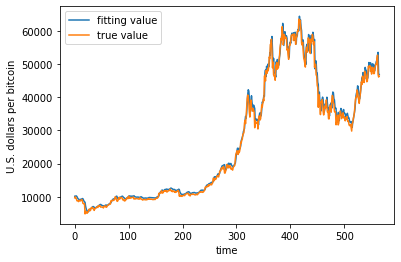

In [46]:
plt.plot(x_valid_predict.reshape(1,-1)[0],label="fitting value")
plt.plot(y_valid[0],label="true value")
plt.xlabel("time")
plt.ylabel("U.S. dollars per bitcoin")
plt.legend()
plt.savefig("../picture/fitting_b_test.png")
plt.show()

### 总体数据预测

In [47]:
x_total_predict = model.predict(x_total)

scaler.fit_transform(pd.DataFrame(google_stock['Value'].values))
# 反归一化
x_total_predict = scaler.inverse_transform(x_total_predict)
y_total = scaler.inverse_transform([y_total])
rms = np.sqrt(np.mean(np.power((y_total - x_total_predict), 2)))
print(f"test_rms:{rms}")
print(f"x_total_predict.shape:{x_total_predict.shape}")
print(f"y_total.shape{y_total.shape}")

test_rms:19993.247040474354
x_total_predict.shape:(1796, 1)
y_total.shape(1, 1796)


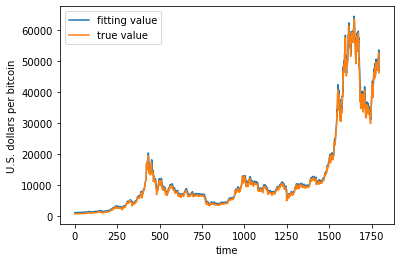

In [48]:
plt.plot(x_total_predict.reshape(1,-1)[0],label="fitting value")
plt.plot(y_total[0],label="true value")
plt.xlabel("time")
plt.ylabel("U.S. dollars per bitcoin")
plt.legend()
plt.savefig("../picture/fitting_b.png")
plt.show()

### 比特币的预测值保存和缺失值填充

In [49]:
predict = np.array([0 for i in range(30)] + list(x_total_predict[:,0]))
print(f"predict.shape:{predict.shape}")
df = pd.read_csv("../data/BCHAIN-MKPRU.csv")
null_index = np.where(np.isnan(df['Value']))[0]
print(f"缺失值索引:{null_index}")

usd_predict = list(predict)
for index in null_index:
    usd_predict.insert(index,0.0)
    df.iloc[index,1] = 0.0
df["BCHAIN-MKPRU_nextday_predict"] = usd_predict
df.to_csv("../data/比特币预测数据.csv",index=False)

predict.shape:(1826,)
缺失值索引:[]


### 黄金比特币对齐

In [50]:
df1 = pd.read_csv("../data/比特币预测数据.csv")
df1

,Date,Value,BCHAIN-MKPRU_nextday_predict
0,9/11/16,621.65,0.000000
1,9/12/16,609.67,0.000000
2,9/13/16,610.92,0.000000
3,9/14/16,608.82,0.000000
4,9/15/16,610.38,0.000000
...,...,...,...
1821,9/6/21,51769.06,50760.511719
1822,9/7/21,52677.40,52722.234375
1823,9/8/21,46809.17,53534.277344
1824,9/9/21,46078.38,46988.546875


In [51]:
df0 = pd.read_csv("../data/黄金预测数据.csv")
df0

,Date,USD (PM),usd_nextday_predict
0,9/12/16,1324.60,0.000000
1,9/13/16,1323.65,0.000000
2,9/14/16,1321.75,0.000000
3,9/15/16,1310.80,0.000000
4,9/16/16,1308.35,0.000000
...,...,...,...
1260,9/6/21,1821.60,1807.020752
1261,9/7/21,1802.15,1807.719971
1262,9/8/21,1786.00,1790.944824
1263,9/9/21,1788.25,1771.256836


In [59]:
usd = []
usd_nextday_predict = []

index = 0
for i in df1.index:
    if df1["Date"][i] == df0["Date"][index]:
        usd.append(df0["USD (PM)"][index])
        usd_nextday_predict.append(df0["usd_nextday_predict"][index])
        index += 1
    else:
        usd.append(0)
        usd_nextday_predict.append(0)
print(f"len(usd):{len(usd)}")
df1["usd"] = usd
df1["usd_nextday_predict"] = usd_nextday_predict
df1.to_csv("../data/黄金比特币预测结果.csv",index=False)
df1

len(usd):1826


,Date,Value,BCHAIN-MKPRU_nextday_predict,usd,usd_nextday_predict
0,9/11/16,621.65,0.000000,0.00,0.000000
1,9/12/16,609.67,0.000000,1324.60,0.000000
2,9/13/16,610.92,0.000000,1323.65,0.000000
3,9/14/16,608.82,0.000000,1321.75,0.000000
4,9/15/16,610.38,0.000000,1310.80,0.000000
...,...,...,...,...,...
1821,9/6/21,51769.06,50760.511719,1821.60,1807.020752
1822,9/7/21,52677.40,52722.234375,1802.15,1807.719971
1823,9/8/21,46809.17,53534.277344,1786.00,1790.944824
1824,9/9/21,46078.38,46988.546875,1788.25,1771.256836


In [58]:
df = pd.merge(df0, df1, how='outer', on='Date')
df["Date"] = df["Date"].apply(lambda x: time.strftime('%Y/%m/%d %H:%M:%S', time.strptime(x, '%m/%d/%y')))
# 排序Date字段
df = df.sort_values("Date")
df

,Date,USD (PM),usd_nextday_predict,Value,BCHAIN-MKPRU_nextday_predict
1265,2016/09/11 00:00:00,NaN,NaN,621.65,0.000000
0,2016/09/12 00:00:00,1324.60,0.000000,609.67,0.000000
1,2016/09/13 00:00:00,1323.65,0.000000,610.92,0.000000
2,2016/09/14 00:00:00,1321.75,0.000000,608.82,0.000000
3,2016/09/15 00:00:00,1310.80,0.000000,610.38,0.000000
...,...,...,...,...,...
1260,2021/09/06 00:00:00,1821.60,1807.020752,51769.06,50760.511719
1261,2021/09/07 00:00:00,1802.15,1807.719971,52677.40,52722.234375
1262,2021/09/08 00:00:00,1786.00,1790.944824,46809.17,53534.277344
1263,2021/09/09 00:00:00,1788.25,1771.256836,46078.38,46988.546875
